In [36]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import math
import numpy as np
from sklearn.metrics.pairwise import haversine_distances
from tqdm import tqdm_notebook as tqdm
import geopandas as gpd
from shapely.geometry import *
from shapely.ops import *

# Считали файл с трассами маршрутов в геоформате

In [37]:
routes=gpd.read_file('routes.geojson')

# Считали последовательность остановок в CSV

In [10]:
stop_seq=pd.read_csv('stop_seq_Tol.csv',sep=';', encoding='windows-1251')

In [11]:
stop_seq[0:1]

,trip_id,stop_id,stop_name,latitude,longitude,route_number,type_ts,nmae_marsh
0,2227622900,stop__9854548,ТРК Вега,53.50019,49.270765,108,minibus,minibus 108


# Сформировали из остановок слой в геоформате

In [12]:
stop_seq_gpd = gpd.GeoDataFrame(stop_seq,  geometry = [Point(xy) for xy in zip(stop_seq['longitude'], stop_seq['latitude'])])
stop_seq_gpd.crs='epsg:4326'

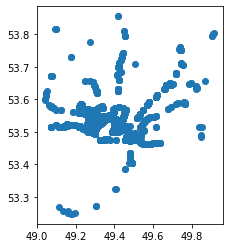

In [13]:
stop_seq_gpd.plot()

## пересекаем те, что не пересекаются со своими же трассами:

In [14]:
stop_seq_gpd[0:1]

,trip_id,stop_id,stop_name,latitude,longitude,route_number,type_ts,nmae_marsh,geometry
0,2227622900,stop__9854548,ТРК Вега,53.50019,49.270765,108,minibus,minibus 108,POINT (49.27077 53.50019)


In [15]:
stop_seq_gpd=stop_seq_gpd[['stop_id','latitude','longitude','geometry']].drop_duplicates()

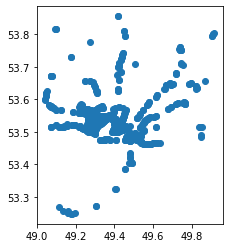

In [16]:
stop_seq_gpd.plot()

In [44]:
routes_dop=routes

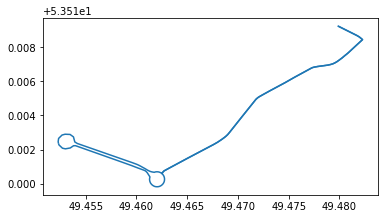

In [45]:
routes_dop.plot()

# пересекли треки с остановками с буфером 50 метров

In [46]:
routes_dop2_buff = routes_dop.to_crs('epsg:32640')
routes_dop2_buff.geometry = routes_dop2_buff.geometry.buffer(100)
routes_dop2_buff = routes_dop2_buff.to_crs('epsg:4326')

stops_with_buff = stop_seq_gpd.to_crs('epsg:32640')
stops_with_buff.geometry = stops_with_buff.geometry.buffer(50)
stops_with_buff = stops_with_buff.to_crs('epsg:4326')


stops_seq_new=gpd.sjoin(routes_dop2_buff,stops_with_buff, how='left', op='intersects', lsuffix='left', rsuffix='right')

In [47]:
stops_seq_new[0:1]

,trip_id,route_number,direction,type_ts,name_marsh,status,length_km,geometry,index_right,stop_id,latitude,longitude
0,3285447517,6,1,bus,bus 6,changed,2.58283,"POLYGON ((49.45321 53.51166, 49.45320 53.51165...",921,stop__9854795,53.509963,49.459113


# Записали результат

In [48]:
stops_seq_new[['trip_id','route_number','stop_id','latitude','longitude']].to_csv('Res.csv')